Importo librerías, gráficos y tiempo:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matriz import matriz

Añado las condiciones de contorno con sus características:

In [ ]:
lim = {'A':75,'B':0,'C':50, 'D':100}
limtipo = {'A':'Temp','B':'Temp','C':'Flujo','D':'Temp'}
Nx=10
Ny=10

Resuelvo usando el archivo matriz.py:

In [ ]:
M,b=matriz(Nx,Ny,lim,limtipo)
T= np.linalg.solve(M,b)

Armo el gràfico:

Text(0, 0.5, 'j')

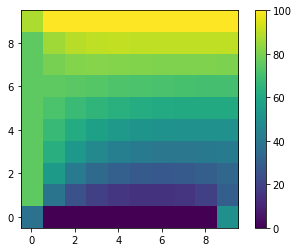

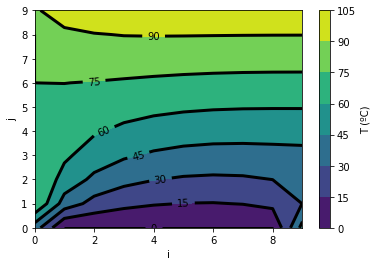

In [ ]:
T_plot = T.reshape((Nx,Ny)) 
algo = plt.imshow(T_plot, origin= 'lower')
plt.colorbar() #Barra de colores.
fig, ax = plt.subplots() #Defino el cuadrado y el gráfico (eje).
mappable = ax.contourf(T_plot) #Gráfico con temperaturas en escalas de colores.
levels = ax.contour(T_plot, colors='k', linewidths=3)
cbar = plt.colorbar(mappable) #Aplico la escala definida anteriormente.
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')

Obtengo los tiempos de cálculo para varios N:

In [ ]:
N = 15
Enes=np.linspace(3,100,N).astype(int)
t0=np.zeros((N,1))
tf=np.zeros((N,1))
for i in range (N):
    t0[i] = time.time()
    M,b=matriz(Enes[i],Enes[i],lim,limtipo)
    T=np.linalg.solve(M,b)
    tf[i]=time.time()
t=tf-t0

Grafico el tiempo de cálculo:

In [ ]:
plt.plot(Enes,t, 'o-k')
plt.xlabel('N')
plt.ylabel('t (s)')
plt.title('Tiempo vs nùmero de nodos')